In [1]:
# p.262 11.5 時系列データからの統計量抽出

import numpy as np
import pandas as pd

def read_data(input_file, i):
    
    def to_date(x, y):
        return str(int(x)) + '-' + str(int(y))
    
    input_data = np.loadtxt(input_file, delimiter=',')
    start = to_date(input_data[0, 0], input_data[0, 1])
    
    if input_data[-1, 1] == 12:
        year = input_data[-1, 0] + 1
        month = 1
    else:
        year = input_data[-1, 0]
        month = input_data[-1, 1] + 1
    end = to_date(year, month)
    
    date_indices = pd.date_range(start, end, freq='M')
    
    output = pd.Series(input_data[:, i], index=date_indices)
    return output

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
input_file = 'data_2D.txt'
x1 = read_data(input_file, 2)
x2 = read_data(input_file, 3)
data = pd.DataFrame({'dim1': x1, 'dim2': x2})

In [4]:
print('Maximum values for each dimension:')
print(data.max())
print('\nMinimum values for each dimension:')
print(data.min())

Maximum values for each dimension:
dim1    99.98
dim2    99.97
dtype: float64

Minimum values for each dimension:
dim1    0.18
dim2    0.16
dtype: float64


In [5]:
print('Overall mean:')
print(data.mean())
print('\nRow-wise mean:')
print(data.mean(axis=1)[:12])

Overall mean:
dim1    49.030541
dim2    50.983291
dtype: float64

Row-wise mean:
1900-01-31    85.595
1900-02-28    75.310
1900-03-31    27.700
1900-04-30    44.675
1900-05-31    31.295
1900-06-30    44.160
1900-07-31    67.415
1900-08-31    56.160
1900-09-30    51.495
1900-10-31    61.260
1900-11-30    30.925
1900-12-31    30.785
Freq: M, dtype: float64


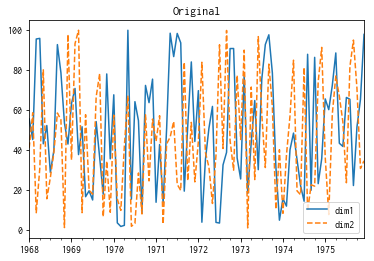

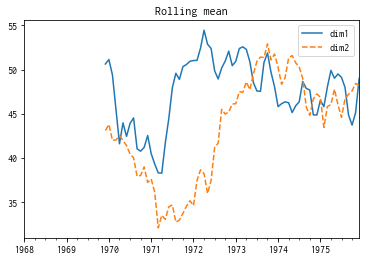

In [6]:
start = '1968'
end = '1975'
data[start:end].plot(style=['-', '--'])
plt.title('Original')
plt.show()
data[start:end].rolling(window=24).mean().plot(style=['-', '--'])
plt.title('Rolling mean')
plt.show()

In [7]:
print('Correlation coefficients:')
print(data.corr())

Correlation coefficients:
         dim1     dim2
dim1  1.00000  0.00627
dim2  0.00627  1.00000


Text(0.5, 1.0, 'Rolling correlation')

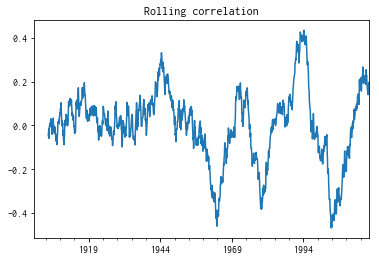

In [8]:
data['dim1'].rolling(window=60).corr(other=data['dim2']).plot()
plt.title('Rolling correlation')